In [1]:
# Corona Death Prediction Regression Model 

#Supress the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing the dataset
data=pd.DataFrame(pd.read_csv('full_data.csv'))


In [4]:
# data visualization
data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
data.shape

(33808, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33808 entries, 0 to 33807
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             33808 non-null  object 
 1   location         33808 non-null  object 
 2   new_cases        33482 non-null  float64
 3   new_deaths       33482 non-null  float64
 4   total_cases      33482 non-null  float64
 5   total_deaths     33482 non-null  float64
 6   weekly_cases     32700 non-null  float64
 7   weekly_deaths    32700 non-null  float64
 8   biweekly_cases   31223 non-null  float64
 9   biweekly_deaths  31223 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.6+ MB


In [7]:
data.describe()

,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
count,33482.000000,33482.000000,3.348200e+04,33482.000000,3.270000e+04,32700.000000,3.122300e+04,31223.000000
mean,1033.170241,40.218028,5.227922e+04,2702.439072,7.065933e+03,280.617034,1.400228e+04,568.546008
std,9565.905486,349.602413,5.327428e+05,25648.392647,6.461949e+04,2371.859219,1.257828e+05,4735.956806
min,-2461.000000,-1918.000000,0.000000e+00,0.000000,-2.372000e+03,-1625.000000,-1.490000e+02,-1616.000000
25%,0.000000,0.000000,2.200000e+01,0.000000,2.000000e+00,0.000000,6.000000e+00,0.000000
50%,6.000000,0.000000,4.600000e+02,9.000000,6.200000e+01,1.000000,1.460000e+02,2.000000
75%,104.000000,2.000000,5.292500e+03,110.000000,7.520000e+02,15.000000,1.567000e+03,32.000000
max,296568.000000,10512.000000,1.729630e+07,673290.000000,1.813952e+06,52264.000000,3.507632e+06,97251.000000


In [8]:
data.isnull().sum()


date                  0
location              0
new_cases           326
new_deaths          326
total_cases         326
total_deaths        326
weekly_cases       1108
weekly_deaths      1108
biweekly_cases     2585
biweekly_deaths    2585
dtype: int64

In [9]:
round(100*(data.isnull().sum()/len(data.index)),2)

date               0.00
location           0.00
new_cases          0.96
new_deaths         0.96
total_cases        0.96
total_deaths       0.96
weekly_cases       3.28
weekly_deaths      3.28
biweekly_cases     7.65
biweekly_deaths    7.65
dtype: float64

In [10]:
### # Data cleaning 

data=data.replace(np.nan,0)


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33808 entries, 0 to 33807
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             33808 non-null  object 
 1   location         33808 non-null  object 
 2   new_cases        33808 non-null  float64
 3   new_deaths       33808 non-null  float64
 4   total_cases      33808 non-null  float64
 5   total_deaths     33808 non-null  float64
 6   weekly_cases     33808 non-null  float64
 7   weekly_deaths    33808 non-null  float64
 8   biweekly_cases   33808 non-null  float64
 9   biweekly_deaths  33808 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.6+ MB


In [12]:
data.tail(10)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
33798,2020-07-22,Zimbabwe,107.0,0.0,1820.0,26.0,786.0,7.0,1033.0,17.0
33799,2020-07-23,Zimbabwe,214.0,0.0,2034.0,26.0,945.0,6.0,1149.0,17.0
33800,2020-07-24,Zimbabwe,90.0,2.0,2124.0,28.0,762.0,5.0,1198.0,16.0
33801,2020-07-25,Zimbabwe,172.0,4.0,2296.0,32.0,876.0,8.0,1354.0,19.0
33802,2020-07-26,Zimbabwe,138.0,2.0,2434.0,34.0,956.0,9.0,1452.0,16.0
33803,2020-07-27,Zimbabwe,78.0,0.0,2512.0,34.0,901.0,9.0,1527.0,16.0
33804,2020-07-28,Zimbabwe,192.0,2.0,2704.0,36.0,991.0,10.0,1670.0,17.0
33805,2020-07-29,Zimbabwe,113.0,4.0,2817.0,40.0,997.0,14.0,1783.0,21.0
33806,2020-07-30,Zimbabwe,62.0,1.0,2879.0,41.0,845.0,15.0,1790.0,21.0
33807,2020-07-31,Zimbabwe,213.0,12.0,3092.0,53.0,968.0,25.0,1730.0,30.0


In [13]:
## ### Data Analysis


data['total_cases'].sum()

1750412969.0

In [14]:
data['total_deaths'].sum()

90483065.0

In [15]:
# Analysing recent cases

data_latest=data[data['date']=="2020-07-31"]

In [16]:
data_latest.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
213,2020-07-31,Afghanistan,71.0,0.0,36542.0,1271.0,614.0,60.0,1472.0,156.0
358,2020-07-31,Albania,92.0,4.0,5197.0,154.0,731.0,31.0,1346.0,50.0
572,2020-07-31,Algeria,602.0,14.0,29831.0,1200.0,4347.0,76.0,8476.0,148.0
718,2020-07-31,Andorra,4.0,0.0,922.0,52.0,33.0,0.0,45.0,0.0
850,2020-07-31,Angola,78.0,1.0,1078.0,48.0,266.0,15.0,471.0,20.0


In [17]:
data_latest.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
33212,2020-07-31,Western Sahara,0.0,0.0,766.0,1.0,0.0,0.0,0.0,0.0
33426,2020-07-31,World,286860.0,6434.0,17296303.0,673290.0,1813952.0,40156.0,3507632.0,83569.0
33539,2020-07-31,Yemen,15.0,2.0,1726.0,487.0,72.0,26.0,174.0,49.0
33674,2020-07-31,Zambia,306.0,3.0,5555.0,149.0,1972.0,21.0,3272.0,67.0
33807,2020-07-31,Zimbabwe,213.0,12.0,3092.0,53.0,968.0,25.0,1730.0,30.0


In [18]:
data_latest['total_cases'].sum()

34306480.0

In [19]:
data_latest['total_deaths'].sum()

1318130.0

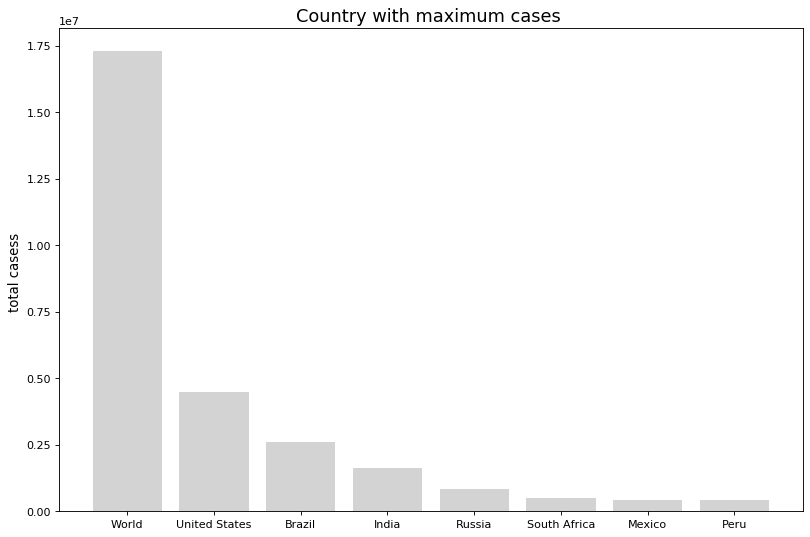

In [20]:
data_latest = data_latest.sort_values(by=['total_cases'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(data_latest['location'][:8], data_latest['total_cases'][:8],
        align='center',color='lightgrey')
plt.ylabel('total casess ', size = 12)
plt.title('Country with maximum cases ', size = 16)
plt.show()

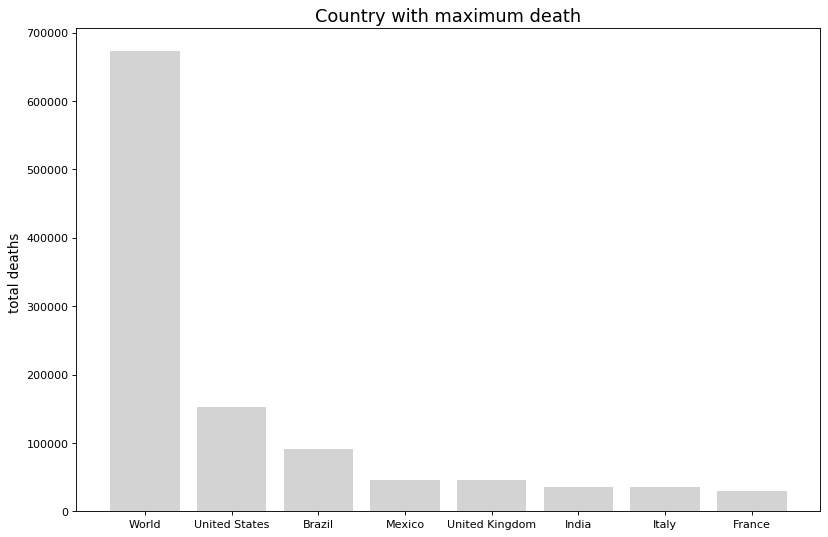

In [21]:
data_latest = data_latest.sort_values(by=['total_deaths'], ascending = False)
plt.figure(figsize=(12,8), dpi=80)
plt.bar(data_latest['location'][:8], data_latest['total_deaths'][:8],
        align='center',color='lightgrey')
plt.ylabel('total deaths ', size = 12)
plt.title('Country with maximum death', size = 16)
plt.show()

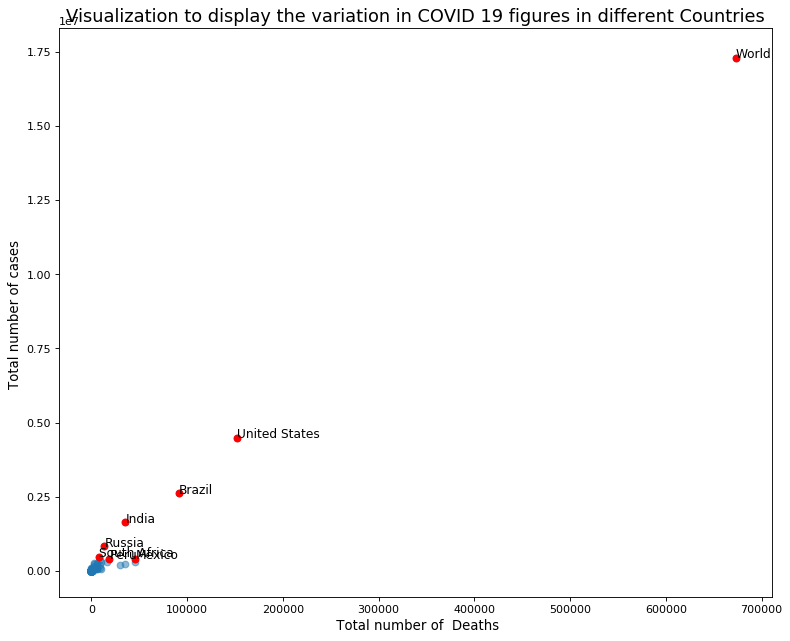

In [22]:
df = data_latest[(data_latest['total_deaths']>=100000) | (data_latest['total_cases']>=400000)]
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(data_latest['total_deaths'], data_latest['total_cases'], alpha=0.5)
plt.xlabel(' Total number of  Deaths', size=12)
plt.ylabel('Total number of cases ', size=12)
plt.scatter(df['total_deaths'], df['total_cases'], color="red")
for i in range(df.shape[0]):
    plt.annotate(df['location'].tolist()[i], xy=(df['total_deaths'].tolist()[i], df['total_cases'].tolist()[i]),
                xytext = (df['total_deaths'].tolist()[i]+1.0, df['total_cases'].tolist()[i]+12.0), size=11)
plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Countries', size=16)
plt.show()

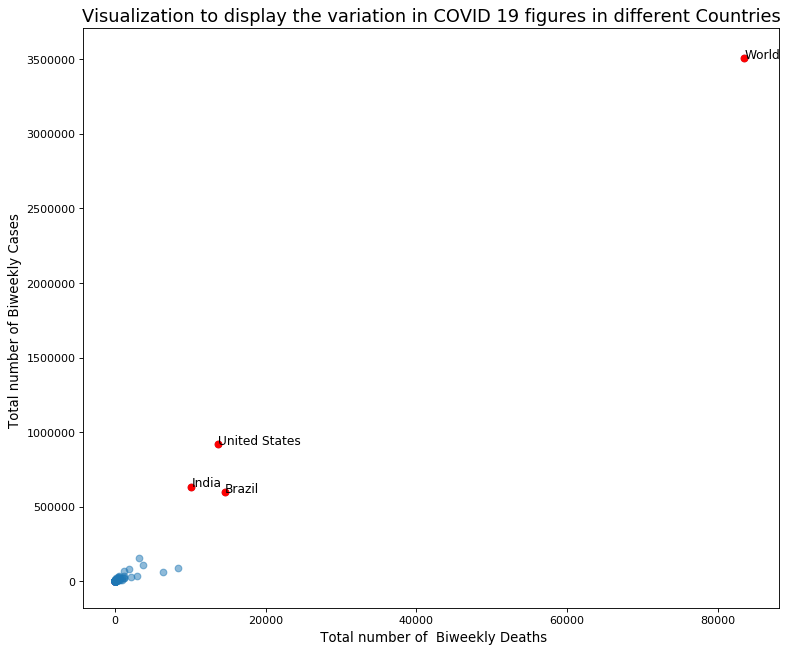

In [23]:
df = data_latest[(data_latest['biweekly_deaths']>=10000) | (data_latest['biweekly_cases']>=400000)]
plt.figure(figsize=(10,8), dpi=80)
plt.scatter(data_latest['biweekly_deaths'], data_latest['biweekly_cases'], alpha=0.5)
plt.xlabel(' Total number of  Biweekly Deaths', size=12)
plt.ylabel('Total number of Biweekly Cases ', size=12)
plt.scatter(df['biweekly_deaths'], df['biweekly_cases'], color="red")
for i in range(df.shape[0]):
    plt.annotate(df['location'].tolist()[i], xy=(df['biweekly_deaths'].tolist()[i], df['biweekly_cases'].tolist()[i]),
                xytext = (df['biweekly_deaths'].tolist()[i]+1.0, df['biweekly_cases'].tolist()[i]+12.0), size=11)
plt.tight_layout()    
plt.title('Visualization to display the variation in COVID 19 figures in different Countries', size=16)
plt.show()

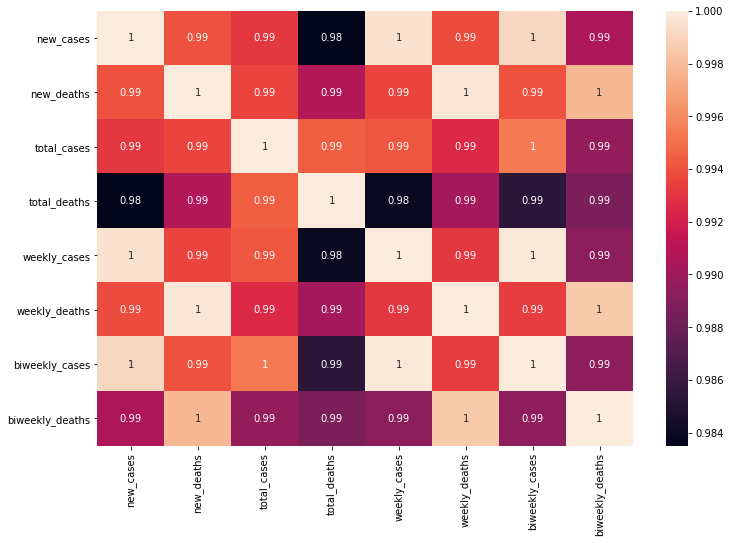

In [24]:
plt.figure(figsize = (12,8))
sns.heatmap(data_latest.corr(), annot=True)

In [25]:
data_latest.tail()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
9914,2020-07-31,Eritrea,14.0,0.0,279.0,0.0,18.0,0.0,28.0,0.0
27018,2020-07-31,Seychelles,0.0,0.0,114.0,0.0,0.0,0.0,14.0,0.0
5482,2020-07-31,Cambodia,0.0,0.0,234.0,0.0,32.0,0.0,63.0,0.0
10416,2020-07-31,Faeroe Islands,0.0,0.0,220.0,0.0,29.0,0.0,32.0,0.0
977,2020-07-31,Anguilla,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0


In [26]:
data_India = data[data['location'] == "India"]
data_India = data_India.iloc[32:]
data_India.reset_index(inplace = True)
data_India = data_India.drop(['index','new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_cases','biweekly_deaths'], axis = 1)
data_India.reset_index(inplace = True)


In [27]:
data_India.head()

,index,date,location,total_cases,total_deaths
0,0,2020-02-01,India,1.0,0.0
1,1,2020-02-02,India,2.0,0.0
2,2,2020-02-03,India,2.0,0.0
3,3,2020-02-04,India,3.0,0.0
4,4,2020-02-05,India,3.0,0.0


In [28]:
data_India.columns = ['level_0', 'date', 'location', 'total_deaths', 'total_cases']
data_India['level_0'] = data_India['level_0'] + 1
print(data_India.shape)
data_India.head()

(182, 5)


,level_0,date,location,total_deaths,total_cases
0,1,2020-02-01,India,1.0,0.0
1,2,2020-02-02,India,2.0,0.0
2,3,2020-02-03,India,2.0,0.0
3,4,2020-02-04,India,3.0,0.0
4,5,2020-02-05,India,3.0,0.0


In [29]:
data_US = data[data['location'] == "United States"]
data_US = data_US.iloc[32:]
data_US.reset_index(inplace = True)
data_US = data_US.drop(['index','new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_cases','biweekly_deaths'], axis = 1)
data_US.reset_index(inplace = True)
data_US.columns = ['level_0', 'date', 'location', 'total_deaths', 'total_cases']
data_US['level_0'] = data_US['level_0'] + 1
print(data_US.shape)
data_US.head()

(182, 5)


,level_0,date,location,total_deaths,total_cases
0,1,2020-02-01,United States,7.0,0.0
1,2,2020-02-02,United States,8.0,0.0
2,3,2020-02-03,United States,11.0,0.0
3,4,2020-02-04,United States,11.0,0.0
4,5,2020-02-05,United States,11.0,0.0


In [30]:
data_Brazil = data[data['location'] == "Brazil"]
data_Brazil = data_Brazil.iloc[32:]
data_Brazil.reset_index(inplace = True)
data_Brazil = data_Brazil.drop(['index','new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_cases','biweekly_deaths'], axis = 1)
data_Brazil.reset_index(inplace = True)
data_Brazil.columns = ['level_0', 'date', 'location', 'total_deaths', 'total_cases']
data_Brazil['level_0'] = data_India['level_0'] + 1
print(data_Brazil.shape)
data_Brazil.head()

(182, 5)


,level_0,date,location,total_deaths,total_cases
0,2,2020-02-01,Brazil,0.0,0.0
1,3,2020-02-02,Brazil,0.0,0.0
2,4,2020-02-03,Brazil,0.0,0.0
3,5,2020-02-04,Brazil,0.0,0.0
4,6,2020-02-05,Brazil,0.0,0.0


In [31]:
data_Italy = data[data['location'] == "Italy"]
data_Italy = data_Italy.iloc[32:]
data_Italy.reset_index(inplace = True)
data_Italy = data_Italy.drop(['index','new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_cases','biweekly_deaths'], axis = 1)
data_Italy.reset_index(inplace = True)
data_Italy.columns = ['level_0', 'date', 'location', 'total_deaths', 'total_cases']
data_Italy['level_0'] = data_India['level_0'] + 1
print(data_Italy.shape)
data_Italy.head()

(182, 5)


,level_0,date,location,total_deaths,total_cases
0,2,2020-02-01,Italy,3.0,0.0
1,3,2020-02-02,Italy,3.0,0.0
2,4,2020-02-03,Italy,3.0,0.0
3,5,2020-02-04,Italy,3.0,0.0
4,6,2020-02-05,Italy,3.0,0.0


In [32]:
data_Mexico = data[data['location'] == "Mexico"]
data_Mexico = data_Mexico.iloc[32:]
data_Mexico.reset_index(inplace = True)
data_Mexico = data_Mexico.drop(['index','new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_cases','biweekly_deaths'], axis = 1)
data_Mexico.reset_index(inplace = True)
data_Mexico.columns = ['level_0', 'date', 'location', 'total_deaths', 'total_cases']
data_Mexico['level_0'] = data_India['level_0'] + 1
print(data_Mexico.shape)
data_Mexico.head()

(182, 5)


,level_0,date,location,total_deaths,total_cases
0,2,2020-02-01,Mexico,0.0,0.0
1,3,2020-02-02,Mexico,0.0,0.0
2,4,2020-02-03,Mexico,0.0,0.0
3,5,2020-02-04,Mexico,0.0,0.0
4,6,2020-02-05,Mexico,0.0,0.0


In [33]:
data_Spain = data[data['location'] == "Spain"]
data_Spain = data_Spain.iloc[32:]
data_Spain.reset_index(inplace = True)
data_Spain = data_Spain.drop(['index','new_cases','new_deaths','weekly_cases','weekly_deaths','biweekly_cases','biweekly_deaths'], axis = 1)
data_Spain.reset_index(inplace = True)
data_Spain.columns = ['level_0', 'date', 'location', 'total_deaths', 'total_cases']
data_Spain['level_0'] = data_India['level_0'] + 1
print(data_Spain.shape)
data_Spain.head()

(181, 5)


,level_0,date,location,total_deaths,total_cases
0,2,2020-02-01,Spain,1.0,0.0
1,3,2020-02-02,Spain,1.0,0.0
2,4,2020-02-03,Spain,1.0,0.0
3,5,2020-02-04,Spain,1.0,0.0
4,6,2020-02-05,Spain,1.0,0.0


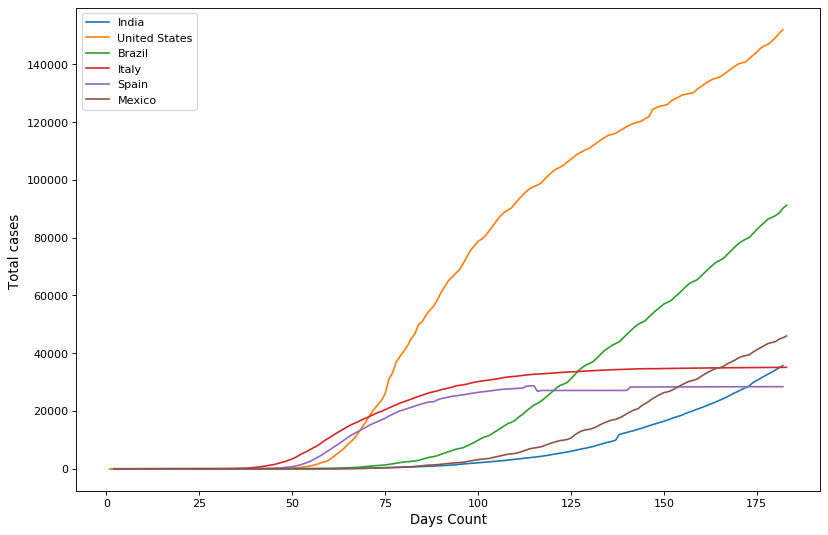

In [34]:
plt.figure(figsize=(12,8), dpi=80)
plt.plot(data_India['level_0'], data_India['total_cases'])
plt.plot(data_US['level_0'], data_US['total_cases'])
plt.plot(data_Brazil['level_0'], data_Brazil['total_cases'])
plt.plot(data_Italy['level_0'], data_Italy['total_cases'])
plt.plot(data_Spain['level_0'], data_Spain['total_cases'])
plt.plot(data_Mexico['level_0'], data_Mexico['total_cases'])
plt.legend(['India', 'United States', 'Brazil', 'Italy', 'Spain', 'Mexico'], loc='upper left')
plt.xlabel('Days Count', size=12)
plt.ylabel('Total cases ', size=12)
plt.show()
